In [2]:
import pickle

data = []
with open('train_dic_with_sem.pkl') as f:
    data = pickle.load(f)

print len(data)

739


In [3]:
print type(data)

<type 'dict'>


In [37]:
for k,v in data.iteritems():
    print k,v['COM101']
    break

1 {'grade': 10, 'semester': 1}


In [106]:
pre_courses = {}
for k,v in data.iteritems():
    for key,val in v.iteritems():
        sem_val = int(val['semester'])
        if sem_val > 0 and sem_val < 4:
            pre_courses[key] = 0
    

In [107]:
pre_courses['CSE131']

0

In [108]:
course_student_dic = {}
course_grade_dic = {}

for k,v in data.iteritems():
    for key, value in v.iteritems():
        sem_val = int(value['semester'])
        if (sem_val>4) and (key not in pre_courses):
#             print key,sem_val
            if key not in course_student_dic:
                course_student_dic[key] = 0
            course_student_dic[key] += 1
            grade_val = int(value['grade'])
            if grade_val>0:
                if key not in course_grade_dic:
                    course_grade_dic[key] = 0
                course_grade_dic[key]+=grade_val

In [109]:
len(course_grade_dic)

226

In [110]:
len(course_student_dic)

244

In [115]:
import operator

sorted_student = sorted(course_student_dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_grade = sorted(course_grade_dic.items(), key=operator.itemgetter(1),reverse=True)

In [121]:
sorted_student[1]

('CSE506', 396)

In [120]:
sorted_grade[1]

('CSE345', 2956)

In [122]:
import json

with open('plot_student.json','wb') as f:
    f.write(json.dumps(sorted_student))
    

In [123]:
with open('plot_grade.json','wb') as f:
    f.write(json.dumps(sorted_grade))
    
    

In [124]:
import numpy as np                                                               
import matplotlib.pyplot as plt

In [125]:
top = []
for i in range(5):
    top.append(sorted_student[i])
    

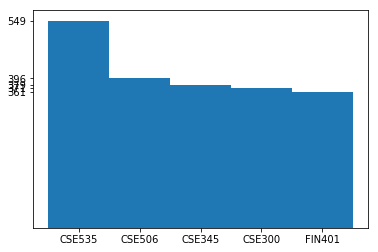

In [126]:
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

plt.savefig('netscore.png')

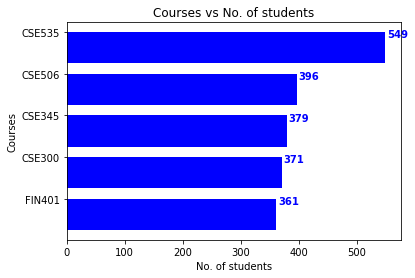

In [194]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []
for i in range(len(top)):
    x.append(top[i][0])
    y.append(top[i][1])
revx = x[::-1]
revy = y[::-1]
x = revx
y = revy

# def plot_bar_x():
#     # this is for plotting purpose
#     index = np.arange(len(label))
#     plt.bar(index, value)
#     plt.xlabel('Course', fontsize=10)
#     plt.ylabel('No. of students', fontsize=10)
#     plt.xticks(index, label, fontsize=10, rotation=30)
#     plt.title('Course vs No. of students')
#     plt.show()

# plot_bar_x()

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Courses vs No. of students')
plt.xlabel('No. of students')
plt.ylabel('Courses')      
plt.savefig('courses_vs_students')
#plt.show()

In [153]:
# ---Pie charts time----

cse535_dic = {}
cse506_dic = {}
cse345_dic = {}
cse300_dic = {}
fin401_dic = {}
for k,v in data.iteritems():
    for key,val in v.iteritems():
        if key == 'CSE535':
            grade_val = val['grade']
            if grade_val not in cse535_dic:
                cse535_dic[grade_val] = 0
            cse535_dic[grade_val]+=1
        if key == 'CSE506':
            grade_val = val['grade']
            if grade_val not in cse506_dic:
                cse506_dic[grade_val] = 0
            cse506_dic[grade_val]+=1
        if key == 'CSE345':
            grade_val = val['grade']
            if grade_val not in cse345_dic:
                cse345_dic[grade_val] = 0
            cse345_dic[grade_val]+=1
        if key == 'CSE300':
            grade_val = val['grade']
            if grade_val not in cse300_dic:
                cse300_dic[grade_val] = 0
            cse300_dic[grade_val]+=1
        if key == 'FIN401':
            grade_val = val['grade']
            if grade_val not in fin401_dic:
                fin401_dic[grade_val] = 0
            fin401_dic[grade_val]+=1

In [154]:
print len(cse535_dic)
print len(cse506_dic)
print len(cse345_dic)
print len(cse300_dic)
print len(fin401_dic)


9
9
9
9
9


In [160]:
del cse535_dic[0]
del cse506_dic[0]
del cse345_dic[0]
del cse300_dic[0]
del fin401_dic[0]


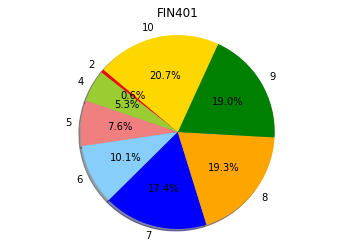

In [193]:
# Data to plot

labels = []
sizes = []
for k,v in fin401_dic.iteritems():
    labels.append(str(k))
    sizes.append(int(v))

# labels = ['Python', 'C++', 'Ruby', 'Java']
# sizes = [215, 130, 245, 210]
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','orange','green','gold']
# explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels,colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('FIN401')
 
plt.axis('equal')
plt.savefig('FIN401')
plt.show()

In [157]:
type(labels)

tuple